In [0]:
from google.colab import drive
import pandas as pd
import numpy as np


In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw

In [0]:
#drive.mount("/content/drive")

In [8]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [12]:
ls

HelloGithub.ipynb  LICENSE  README.md


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [24]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [25]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
538,AVpfEqclLJeJML431yDM,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:02Z,2016-11-07T00:45:02Z,"[{""dateSeen"":[""2016-11-07T00:45:02Z""],""sourceU...",NaN,6.993026e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/34a0949e-17c7...,NaN,"josmo/8190whtp2,699302630611,0699302630611",NaN,8190-WHTP-2,"[{""dateSeen"":[""2016-11-07T00:45:02Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, White P...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:02Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302630611,NaN,NaN,NaN
15850,AVpffuhNilAPnD_xcw-h,NaN,Jordan,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Mid NavyWhiteInfrared Black,NaN,2017-01-22T06:19:36Z,2017-01-22T06:19:36Z,"[{""dateSeen"":[""2017-01-22T06:19:36Z""],""sourceU...",NaN,NaN,"[{""key"":""Shoe Size"",""value"":[""8.5 D(M) US""]},{...",NaN,https://i5.walmartimages.com/asr/b255b3f2-1c89...,NaN,"886548922000,jordan/823581401",Jordan,823581-401,"[{""dateSeen"":[""2017-01-22T06:19:36Z""],""name"":""...",Jordan Horizon Men's Shoes Mid Navy/white/infr...,84.95,84.95,NaN,NaN,new,NaN,USD,2017-01-22T06:19:36Z,2017-01-20T00:00:00Z,NaN,false,RIGHT BOOT FORWARD - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Jordan-Horizon-Men-...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Jordan-Horizon-Men-...,886548922000,NaN,NaN,NaN
13018,AVpfn9GfilAPnD_xfO_d,NaN,Treds,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Blacks,NaN,2016-11-07T00:45:25Z,2016-11-07T00:45:25Z,"[{""dateSeen"":[""2016-06-16T00:04:42Z""],""sourceU...",NaN,NaN,"[{""key"":""Shoe Size"",""value"":[""US 13""]},{""key"":...",NaN,https://i5.walmartimages.com/asr/2fb54012-848e...,NaN,"790990178550,treds/17855",Treds,17855,"[{""dateSeen"":[""2016-11-07T00:45:25Z""],""name"":""...",Treds 17855 Treds Rubber Overshoe Boot,56.63,56.63,NaN,NaN,new,NaN,USD,2016-11-07T00:45:25Z,2016-11-05T00:00:00Z,NaN,false,Supply the Home - Walmart.com,CLEARANCE USD 6.75,90-Day,NaN,NaN,NaN,https://www.walmart.com/ip/17-L-Xl-Tred-Rubbr-...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/17-L-Xl-Tred-Rubbr-...,790990178550,NaN,NaN,NaN
5431,AVpfJxmAilAPnD_xWEnU,NaN,Hulkamania,"All Men's Clothing,Men's Activewear,Men's Clot...",Red,NaN,2016-01-02T03:04:45Z,2016-04-06T04:47:20Z,NaN,NaN,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/22241/prod_403...,NaN,hulkamania/hulkpants001,NaN,hulkpants001,NaN,Hulkamania Red and Yellow Tie-dye Wrestling Le...,18.95,18.95,NaN,NaN,NaN,NaN,USD,2016-01-02T03:04:45Z,2016-03-31T00:00:00Z,NaN,false,Sears.com,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,"3X,XXL,S,L,M,XL","[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/config/produc...,NaN,NaN,NaN,NaN
11860,AVpfoRG51cnluZ0-oUzR,NaN,Magliner,"Power Tools,Men's Work Gloves,Household Essent...",NaN,NaN,2017-01-03T13:57:25Z,2017-01-03T13:57:25Z,"[{""dateSeen"":[""2016-10-31T00:26:12Z""],""sourceU...",12 in x 5.5 in x 13.5 in,NaN,"[{""key"":""Fits brands"",""value"":[""Magliner""]},{""...",NaN,http://www.homedepot.com/catalog/productImages...,NaN,"magliner/302682,magliner302682accessorybagcanv...",Magliner,302682,"[{""dateSeen"":[""2017-01-03T13:57:25Z""],""name"":""...","Magliner 302682 Accessory Bag,canvas,18 In X 1...",62.95,62.9

In [26]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [27]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [28]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
PalmBeach Jewelry - Walmart.com                           3
new                                                       3
New with box                                              3
UnbeatableSale.com, Inc. - Walmart.com                    3
Wholesale Costume and Party Supplies - Walmart.com        2
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Name: prices_currency, dtype: int64

In [29]:
df_usd = df[df.prices_currency == 'USD' ].copy()
df_usd.shape

(18524, 48)

In [30]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

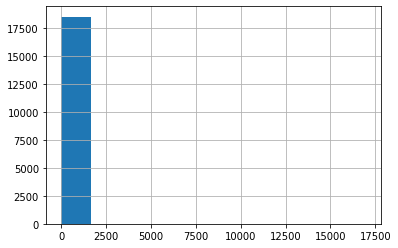

In [31]:
df_usd.prices_amountmin = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [33]:
filter_max = np.percentile( df_usd['prices_amountmin'], 99)
filter_max

895.0

In [0]:
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max ]

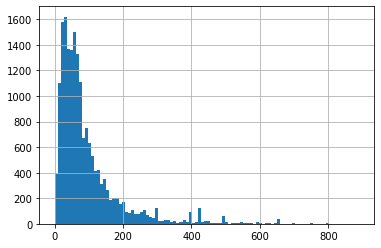

In [37]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [38]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
df.to_csv('data/shoes_prices.csv',index=False)

In [0]:
!git add matrix_one/day3.ipynb

In [44]:
!git commit -m "Read Men's Shoe Prices dataset from data.world"

[master d62b92f] Read Men's Shoe Prices dataset from data.world
 2 files changed, 2 insertions(+), 129 deletions(-)
 rewrite .gitignore (100%)
 create mode 100644 matrix_one/day3.ipynb


In [0]:
!git config --global user.email "jarek@authoring.pl"
!git config --global user.name "wideowsieci"

In [48]:
!git push -u origin master

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (5/5), 18.79 KiB | 3.13 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0)
To https://github.com/wideowsieci/dw_matrix.git
   113e7a3..d62b92f  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [0]:
!git reset --soft HEAD^
!git commit -a -m "Read Men's Shoe Prices dataset from data.world"
!git push